In [28]:
import pymc3 as pm
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

In [65]:
n = 10e2
p_true = 0.5
p_shape = 1000

# np.random.binomial(1, .8, size=p_shape)

In [66]:
obs = np.random.binomial(n, p_true, size=p_shape)
obs[:10]

array([499, 475, 509, 501, 505, 495, 499, 526, 506, 484])

In [79]:
with pm.Model() as model:
    alpha = pm.HalfNormal('alpha', 1)
    beta = pm.HalfNormal('beta', 1)
    
    p = pm.Beta('p', alpha, beta, shape=p_shape)
    
    y = pm.BetaBinomial('obs', n=n, alpha=alpha, beta=beta, observed=obs)

    trace = pm.sample(10000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/claus/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_logodds__, beta_log__, alpha_log__]
100%|██████████| 10500/10500 [03:55<00:00, 44.66it/s]


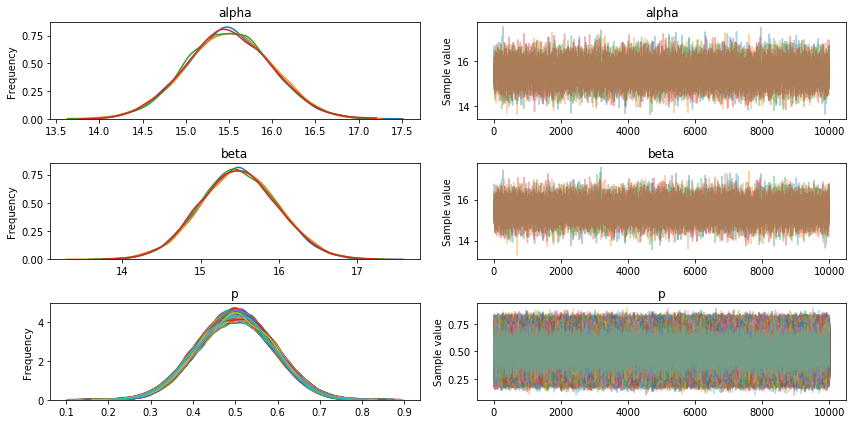

In [80]:
with model:
    pm.traceplot(trace)

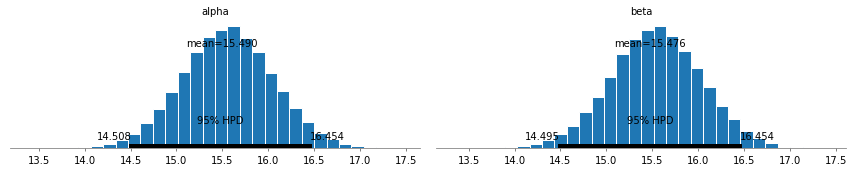

In [70]:
with model:
    pm.plot_posterior(trace)

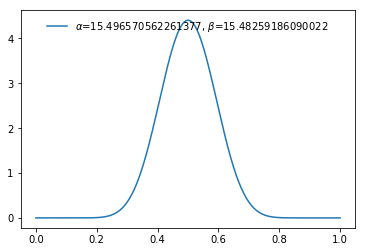

In [81]:
import scipy.stats as st

x = np.linspace(0.0, 1.0, 1000)
fig, ax = plt.subplots()
f = lambda a, b : st.beta.pdf(x, a, b)
plot_pdf = lambda a, b : ax.plot(x, f(a,b), label=r'$\alpha$={0}, $\beta$={1}'.format(a,b))

plot_pdf(np.mean(trace['alpha']), np.mean(trace['beta']))

plt.legend(loc='upper center', frameon=False)
plt.show()

In [82]:
with model:
    ppc = pm.sample_ppc(trace, 1000) #, vars=[p])

100%|██████████| 1000/1000 [00:00<00:00, 2894.85it/s]


In [84]:
ppc

{'obs': array([536, 611, 554, 563, 620, 423, 438, 506, 549, 594, 361, 513, 505,
        392, 493, 610, 740, 473, 671, 572, 406, 391, 549, 428, 424, 385,
        410, 432, 780, 454, 392, 582, 410, 440, 546, 442, 517, 575, 604,
        386, 577, 410, 418, 620, 556, 513, 622, 505, 440, 370, 526, 455,
        572, 509, 405, 619, 419, 383, 652, 517, 465, 495, 495, 476, 455,
        473, 626, 346, 535, 564, 550, 586, 429, 487, 469, 501, 371, 462,
        358, 402, 520, 431, 522, 403, 386, 411, 632, 393, 530, 463, 540,
        487, 478, 617, 510, 332, 532, 494, 453, 471, 506, 460, 619, 481,
        404, 405, 285, 546, 505, 521, 414, 439, 590, 614, 556, 375, 303,
        564, 599, 582, 567, 221, 509, 536, 600, 617, 409, 565, 455, 528,
        427, 431, 414, 582, 432, 405, 436, 360, 452, 419, 615, 423, 578,
        398, 444, 426, 453, 494, 372, 501, 461, 432, 468, 521, 495, 620,
        494, 418, 345, 616, 563, 297, 372, 456, 527, 616, 540, 615, 569,
        580, 575, 605, 456, 526, 492, 439, 5

In [83]:
np.mean(ppc['p'])

KeyError: 'p'

In [77]:
# plt.hist(ppc['p'], bins=50);